## Final Project Submission

Please fill out:
* Student name: Jenyl Murdock
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Joe San Pietro
* Blog post URL:


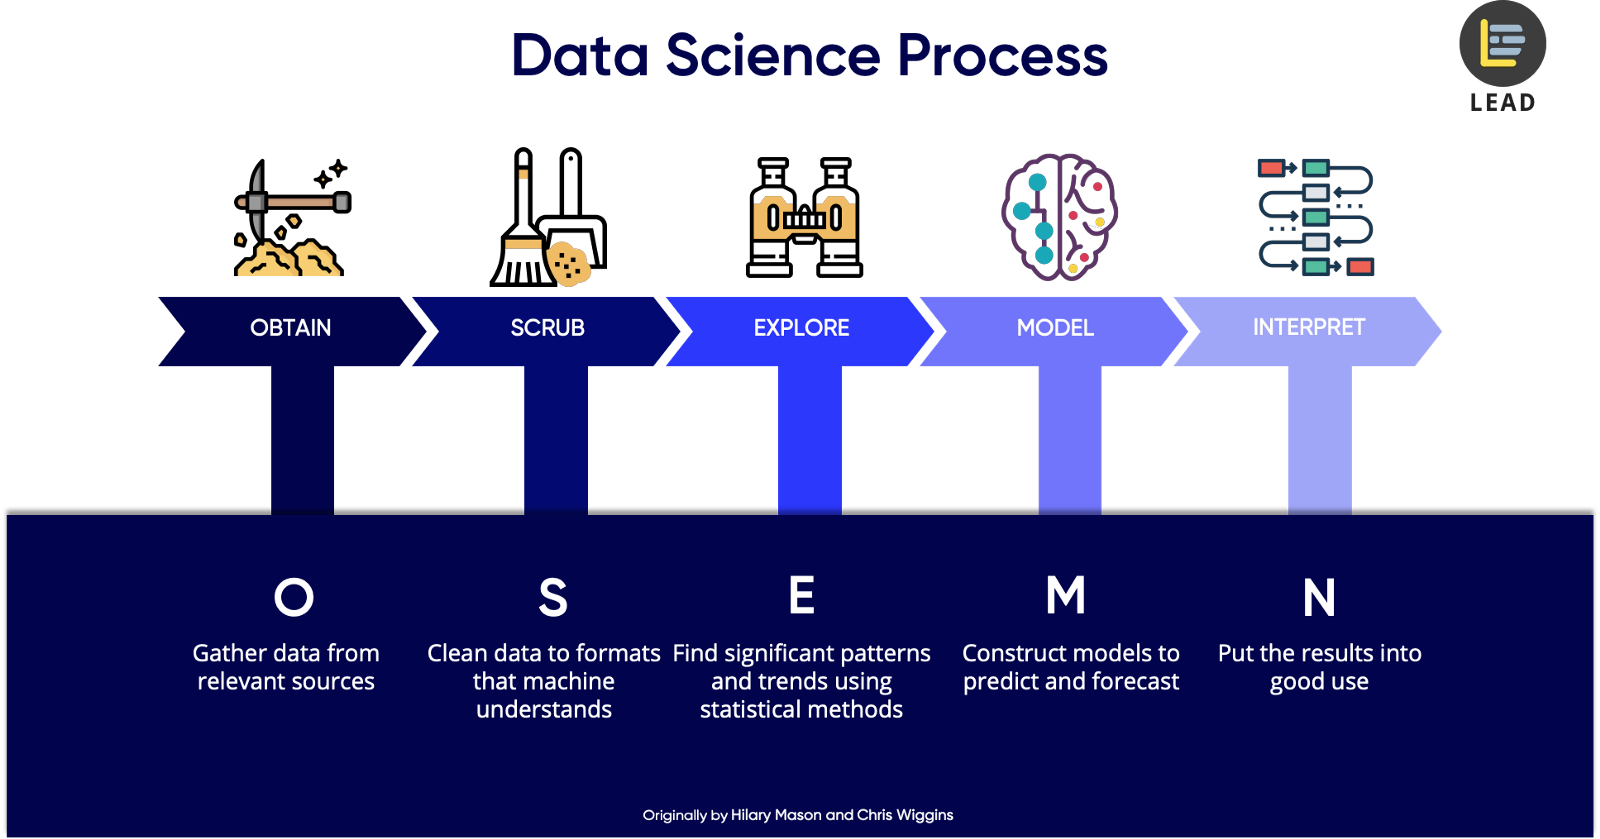

**_Obtain_**:

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**_Scrub_**:

During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**_Explore_**:

This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**_Model_**:

This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**_Interpret_**:

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  


In [2]:
# access the data file and get a visual of the information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check for multicollinearity
import seaborn as sns

# look at results for each linear regression model using statsmodels
import statsmodels.formula.api as smf

kc = pd.read_csv('kc_house_data.csv')
print ('shape of the data -', kc.shape)
kc.head(10)

shape of the data - (21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Insert description of column names, grade, & condition here

For bathrooms:
Values are decimal and calculated as:
Full bathrooms (ensuite) = 1
Half bathrooms (separate )= 0.5
Powder rooms (only toilet and sink) = 0.25
(Dahlin, 2016)

II.  Scrub the data

In [3]:
# The id column is not needed so it can be dropped from the data
kc = kc.drop(['id'], axis=1)
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


B.  Remove null values

In [4]:
# Check for null values in the dataset 
kc.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

View has 63 null values.  Because this is not a significant number, these can be dropped from our data

In [5]:
print (kc.view.unique())
print (kc.view.value_counts())

[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [6]:
# select only the data for where the view is not a nan value
# convert view to data type string so the 'nan' data can be dropped
kc['view'] = kc.view.astype(str)
kc = kc[kc.view != 'nan'] 
kc['view'] = kc.view.astype(float)

# replace null values with 0 in waterfront column and change to data type integer
kc.waterfront = kc.waterfront.fillna(value=0)

# replace null values in yr_renovated with 0 and change to data type integer
kc.yr_renovated = kc.yr_renovated.fillna(value=0)


In [7]:
# Verify that there are not any more null values
kc.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

C.  reformat some columns and remove outliers

In [8]:
# check to see how each column is categorized
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [9]:
kc.floors.value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [10]:
print(kc.bathrooms.value_counts())
kc = kc[kc['bathrooms'] < 6]

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


In [11]:
# Start with an initial data type conversion
# For columns that are obviouly categorized wrong, convert them to an appropriate data type
kc['date'] = pd.to_datetime(kc.date)

# set view, waterfront & yr_renovated as integer
kc['view'] = kc.view.astype(int)
kc['waterfront'] = kc.waterfront.astype(int)
kc['yr_renovated'] = kc.yr_renovated.astype(int)

In [12]:
# Check columns for unusable data by looking at the unique values for each variable
# change to correct data type as needed

kc.floors.unique()

kc.condition.unique()

kc.grade.unique()

kc.sqft_living.unique() 
kc.sqft_lot.unique()
kc.sqft_above.unique()

# Bedrooms has one extreme outlier.  Let's look at the unique values.
kc.bedrooms.unique()
print ('bedroom value counts:', kc.bedrooms.value_counts())
kc = kc[kc['bedrooms'] < 7]
                   
kc.sqft_basement.unique()

(kc.sqft_basement =='?').sum()  # there are 450 '?' in this column
(kc.sqft_basement == '0.0').sum()  # there are 12798 '0.0' values in this column

# Replace the '?' values with 0 in the sqft_basement data
kc['sqft_basement'] = (kc['sqft_basement'].replace('?', 0)).astype(float)
kc['sqft_basement'] = kc['sqft_basement'].astype(int)

# Instead of square feet values for the basement, let's just use a categorical value of 1 for if it has a basement
# and 0 for if it does not have a basement.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['basement'] = kc['sqft_basement'].apply(lambda row: 0 if row == 0 else 1)

print ('\nview value counts:', kc['view'].value_counts())

# A significant majority of the values for the variable view are 0, let's just use a categorical value of 1 for 
# if it has a view and 0 for if it does not have a view.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb

kc['has_view'] = kc['view'].apply(lambda row: 1 if row != 0 else 0)
print ('\nhas_view values:', kc['has_view'].unique())
                

bedroom value counts: 3     9791
4     6865
2     2754
5     1588
6      267
1      196
7       36
8       12
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

view value counts: 0    19366
2      952
3      505
1      327
4      311
Name: view, dtype: int64

has_view values: [0 1]


0       20726
2014       73
2003       30
2007       30
2013       30
2000       29
2005       28
1990       22
2004       22
2006       20
1989       20
2009       20
2002       17
1998       16
1991       16
2001       15
1984       15
1983       15
2008       15
1994       14
1986       14
1985       14
1999       14
2015       14
2010       14
1987       13
1992       13
1993       12
1997       12
1996       11
        ...  
1975        5
1964        5
1969        4
1981        4
1965        4
1973        4
1963        4
1958        3
1956        3
1945        3
1978        3
1955        3
1960        3
1972        3
1940        2
1957        2
1962        2
1967        2
1974        2
1951        1
1953        1
1946        1
1954        1
1950        1
1948        1
1934        1
1959        1
1971        1
1944        1
1976        1
Name: yr_renovated, Length: 70, dtype: int64
0       21200
2014       73
2013       30
2007       30
2005       28
2009       20
2006       20
200

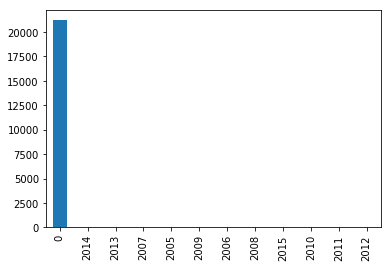

In [13]:
print(kc['yr_renovated'].value_counts())

# anything renovated before 2005 is 10 years old already
years = kc.loc[:,'yr_renovated']
for year in years:
    if year < 2005:
        kc['yr_renovated'] = (kc['yr_renovated'].replace(year, 0)).astype(int)
print (kc['yr_renovated'].value_counts())
kc['yr_renovated'].value_counts().plot(kind='bar')

In [14]:
# Convert the year built to reflect the age of the house. This format will be easier to visualize
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['yr_built'].describe()
kc['age'] = (kc.yr_built.max() - kc.yr_built + 1)
kc = kc.drop(['yr_built'], axis=1)
kc.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,has_view,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,0,98178,47.5112,-122.257,1340,5650,0,0,61
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,0,98125,47.7210,-122.319,1690,7639,1,0,65


In [15]:
# Get the range of zip codes and calculate bin size based on water locations 
kc.zipcode.describe()

count    21461.000000
mean     98077.930712
std         53.516313
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

/Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


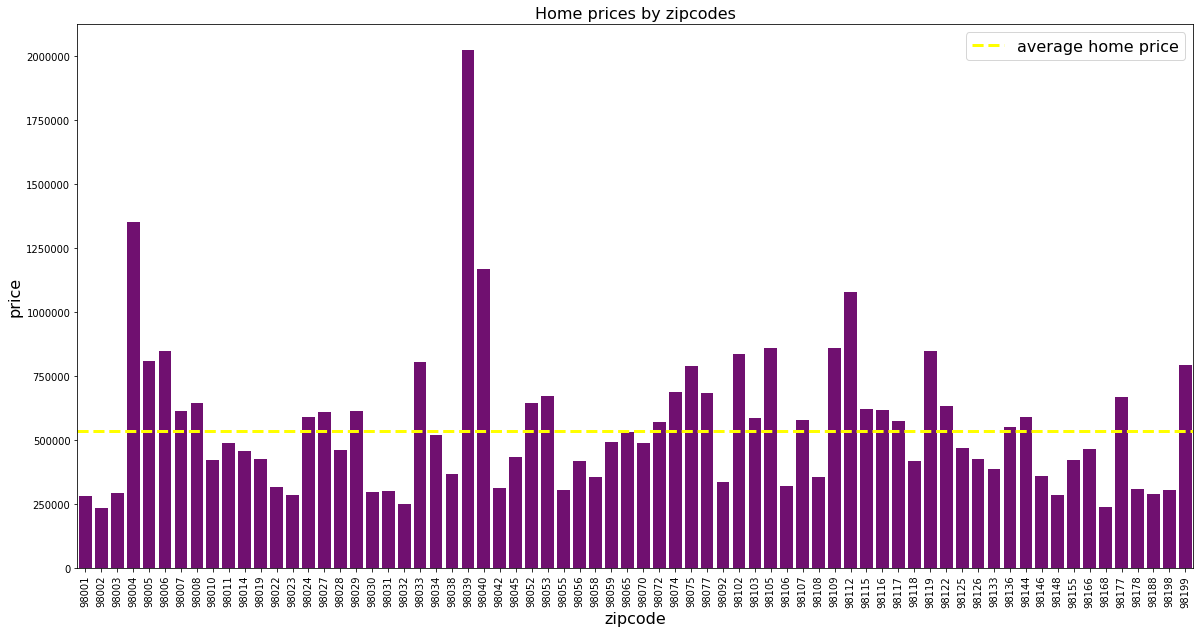

In [16]:
# plot home prices in zipcodes
# https://github.com/stevhliu/predicting-house-sales-price/blob/master/multivariable_linreg.ipynb

f, ax = plt.subplots(figsize = (20, 10))
#sequential_colors = sns.color_palette("RdPu", 10)
sns.barplot(kc['zipcode'], kc['price'], ci = False, color = 'purple')

# draw line for average home price
ax.axhline(y = kc['price'].mean(), color = 'yellow', lw = 3, linestyle = '--', label = 'average home price')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Home prices by zipcodes', fontsize = 16)
plt.xlabel('zipcode', fontsize = 16)
plt.ylabel('price', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

In [17]:
kc.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98146, 98038,
       98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040,
       98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118,
       98199, 98032, 98045, 98102, 98077, 98198, 98108, 98168, 98177,
       98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031,
       98106, 98072, 98188, 98065, 98014, 98055, 98039])

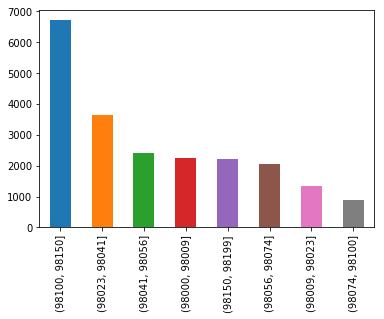

In [18]:
# create bins for zipcode
bins = [98000, 98009, 98023, 98041, 98056, 98074 , 98100 , 98150, 98199]
bins_zip = pd.cut(kc['zipcode'], bins)
bins_zip.value_counts().plot(kind='bar')

In [19]:
# replace the existing zipcode column
kc['zipcode'] = bins_zip
kc['zipcode'] = kc['zipcode'].cat.codes

In [20]:
# Check that all data is converted to appropriate data type
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21461 entries, 0 to 21596
Data columns (total 22 columns):
date             21461 non-null datetime64[ns]
price            21461 non-null float64
bedrooms         21461 non-null int64
bathrooms        21461 non-null float64
sqft_living      21461 non-null int64
sqft_lot         21461 non-null int64
floors           21461 non-null float64
waterfront       21461 non-null int64
view             21461 non-null int64
condition        21461 non-null int64
grade            21461 non-null int64
sqft_above       21461 non-null int64
sqft_basement    21461 non-null int64
yr_renovated     21461 non-null int64
zipcode          21461 non-null int8
lat              21461 non-null float64
long             21461 non-null float64
sqft_living15    21461 non-null int64
sqft_lot15       21461 non-null int64
basement         21461 non-null int64
has_view         21461 non-null int64
age              21461 non-null int64
dtypes: datetime64[ns](1), float64(5)

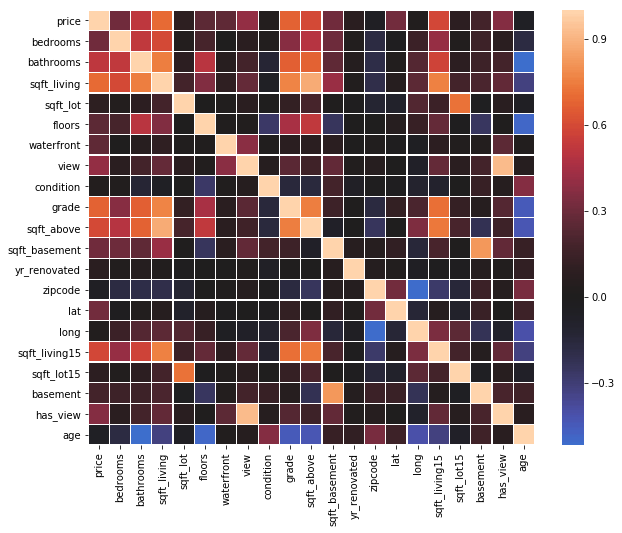

In [21]:
# Set up the matplotlib figure and generate a heatmap of the data
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(kc.corr(), center = 0, linewidths = .25);

It looks like sqft_living, grade has high collinearity with some other features


A correlation is consider high if its absolute value is around 0.7 - 0.8.
Let's use 0.75 as a guide to see how many high correlations there are.
This showed a high correlation between sqft_lot and sqft_lot15.  Let's go ahead and
drop the sqft_lot15 variable

In [22]:
print (abs(kc.corr() > 0.75))

               price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True        False     False   False   
sqft_living    False     False      False         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False         True     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_renovated

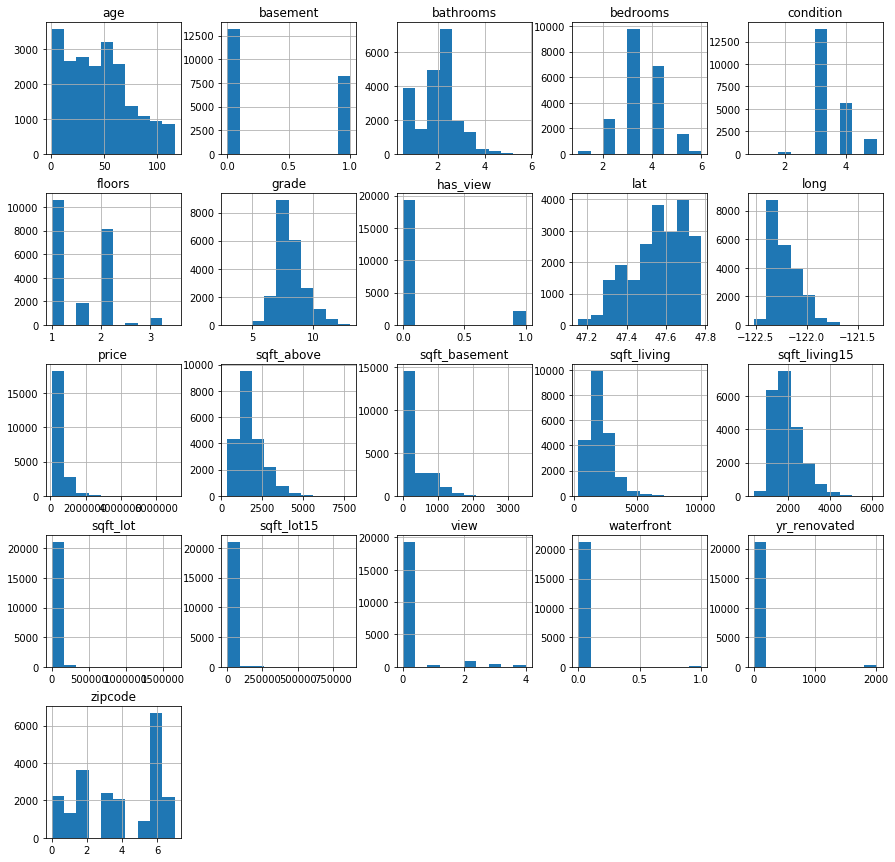

In [23]:
# Get an initial visualization of the data
# Note:  extra white space on either side of the graph indicates outliers which need to be removed
kc.hist(figsize=(15,15));

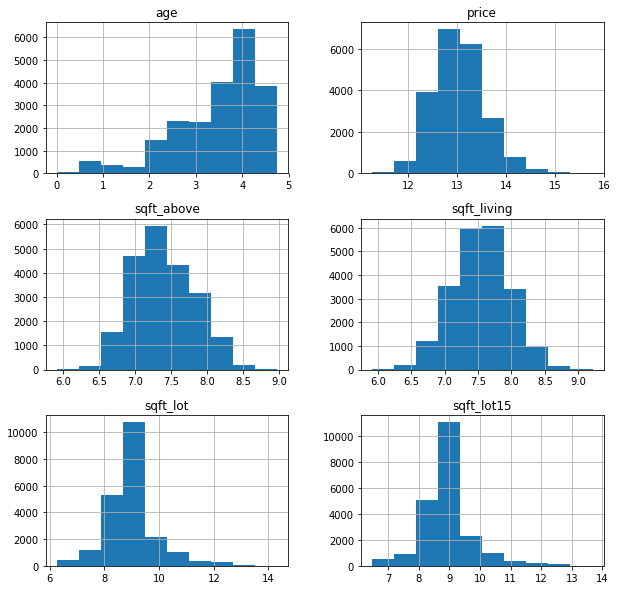

In [24]:
# Normalize the data of the continuous variables using log transformation

import numpy as np
kc_log = pd.DataFrame([])

kc_log['price'] = np.log(kc.price)
kc_log['age'] = np.log(kc.age)
kc_log['sqft_above'] = np.log(kc.sqft_above)
kc_log['sqft_living'] = np.log(kc.sqft_living)
kc_log['sqft_lot'] = np.log(kc.sqft_lot)
kc_log['sqft_lot15'] = np.log(kc.sqft_lot15)


# look at the histograms of the transformed data
kc_log.hist(figsize = (10,10));

Because bedrooms, condition, & floors could not be coerced into a normal distribution, they should be
considered for elimination.  Also latitude & longitude should be considered.

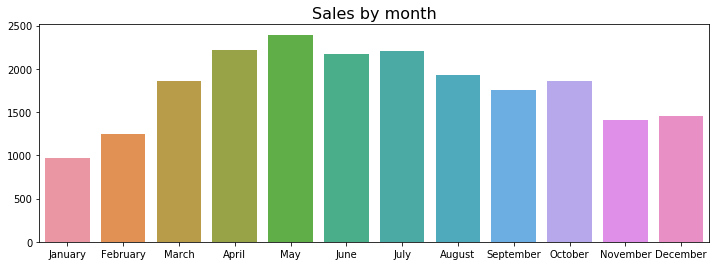

In [25]:
# graph the number of sales by month
# https://github.com/arseniyturin/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(kc.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

In [26]:
# Convert categorical columns to numeric format with one-hot encoding

kc['bedrooms'] = kc.bedrooms.astype('category')
kc['bathrooms'] = kc.bathrooms.astype('category')
kc['floors'] = kc.floors.astype('category')
kc['condition'] = kc.condition.astype('category')
kc['grade'] = kc.grade.astype('category')
kc['has_view'] = kc.has_view.astype('category')
kc['waterfront'] = kc.waterfront.astype('category')
kc['yr_renovated'] = kc.yr_renovated.astype('category')
kc['basement'] = kc.basement.astype('category')



bed_dummies = pd.get_dummies(kc.bedrooms, prefix = 'bedrooms')
bath_dummies = pd.get_dummies(kc.bathrooms, prefix = 'bathrooms')
floors_dummies = pd.get_dummies(kc.floors, prefix = 'floors')
cond_dummies = pd.get_dummies(kc.condition, prefix = 'condition')
grade_dummies = pd.get_dummies(kc.grade, prefix = 'grade')
has_view_dummies = pd.get_dummies(kc.has_view, prefix = 'view')
water_dummies = pd.get_dummies(kc.waterfront, prefix = 'waterfront')
renov_dummies = pd.get_dummies(kc.yr_renovated, prefix = 'yr_renovated')
basement_dummies = pd.get_dummies(kc.basement, prefix = 'basement')
zip_dummies = pd.get_dummies(bins_zip, prefix = 'zip')


# combine the log transformed data with the categorical dummy variables
kc_final = pd.concat([kc_log, bed_dummies, bath_dummies, floors_dummies, cond_dummies, grade_dummies], axis=1)
kc_final = pd.concat([kc_final, has_view_dummies, water_dummies, basement_dummies, zip_dummies], axis=1 )


In [27]:
# set the max_columns attribute in order to view all of the column names with the categorical data
pd.set_option('display.max_columns', None)
kc_final.head()

,price,age,sqft_above,sqft_living,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98009]","zip_(98009, 98023]","zip_(98023, 98041]","zip_(98041, 98056]","zip_(98056, 98074]","zip_(98074, 98100]","zip_(98100, 98150]","zip_(98150, 98199]"
0,12.309982,4.110874,7.073270,7.073270,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,12.100712,4.418841,6.646391,6.646391,9.210340,8.994917,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,8.517193,8.517193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,13.142166,3.367296,7.426549,7.426549,8.997147,8.923058,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [28]:
# rename columns for bathrooms & floors to eliminate decimals

kc_final.rename(columns = {'bathrooms_0.5':'bath_h', 'bathrooms_0.75':'bath_3q', 'bathrooms_1.0':'bath_1'}, inplace=True)
kc_final.rename(columns = {'bathrooms_1.25':'bath1_q','bathrooms_1.5':'bath1_h', 'bathrooms_1.75':'bath1_3q', 'bathrooms_2.0':'bath_2'}, inplace=True)
kc_final.rename(columns = {'bathrooms_2.25':'bath2_q','bathrooms_2.5':'bath2_h', 'bathrooms_2.75':'bath2_3q', 'bathrooms_3.0':'bath_3'}, inplace=True)
kc_final.rename(columns = {'bathrooms_3.25':'bath3_q','bathrooms_3.5':'bath3_h', 'bathrooms_3.75':'bath3_3q', 'bathrooms_4.0':'bath_4'}, inplace=True)
kc_final.rename(columns = {'bathrooms_4.25':'bath4_q','bathrooms_4.5':'bath4_h', 'bathrooms_4.75':'bath4_3q', 'bathrooms_5.0':'bath_5'}, inplace=True)
kc_final.rename(columns = {'bathrooms_5.25':'bath5_q','bathrooms_5.5':'bath5_h', 'bathrooms_5.75':'bath5_3q'}, inplace=True)

kc_final.head(2)

,price,age,sqft_above,sqft_living,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98009]","zip_(98009, 98023]","zip_(98023, 98041]","zip_(98041, 98056]","zip_(98056, 98074]","zip_(98074, 98100]","zip_(98100, 98150]","zip_(98150, 98199]"
0,12.309982,4.110874,7.073270,7.073270,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [29]:
# rename floors columns to remove decimals

kc_final.rename(columns = {'floors_1.0':'floors_1', 'floors_1.5':'floors_1h'}, inplace=True)
kc_final.rename(columns = {'floors_2.0':'floors_2', 'floors_2.5':'floors_2h'}, inplace=True)
kc_final.rename(columns = {'floors_3.0':'floors_3', 'floors_3.5':'floors_3h'}, inplace=True)
kc_final.head()

,price,age,sqft_above,sqft_living,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98009]","zip_(98009, 98023]","zip_(98023, 98041]","zip_(98041, 98056]","zip_(98056, 98074]","zip_(98074, 98100]","zip_(98100, 98150]","zip_(98150, 98199]"
0,12.309982,4.110874,7.073270,7.073270,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,12.100712,4.418841,6.646391,6.646391,9.210340,8.994917,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,8.517193,8.517193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,13.142166,3.367296,7.426549,7.426549,8.997147,8.923058,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [30]:
# rename zipcode columns to remove issues with bin names

kc_final.rename(columns = {'zip_(98000, 98009]':'zip_1', 'zip_(98009, 98023]':'zip_2'}, inplace=True)
kc_final.rename(columns = {'zip_(98023, 98041]':'zip_3', 'zip_(98041, 98056]':'zip_4'}, inplace=True)
kc_final.rename(columns = {'zip_(98056, 98074]':'zip_5', 'zip_(98074, 98100]':'zip_6'}, inplace=True)
kc_final.rename(columns = {'zip_(98100, 98150]':'zip_7', 'zip_(98150, 98199]':'zip_8'}, inplace=True)

kc_final.head()

,price,age,sqft_above,sqft_living,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8
0,12.309982,4.110874,7.073270,7.073270,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,12.100712,4.418841,6.646391,6.646391,9.210340,8.994917,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,8.517193,8.517193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,13.142166,3.367296,7.426549,7.426549,8.997147,8.923058,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [31]:
# run an OLS regression on the log transformed continuous variables

col_names = kc_final.columns[1:6]
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ age
-------------------------------------
['age', 0.01997945197442741, 13.321980446627375, -0.07922686826563163, 3.489253781083607e-96]
Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3393229836531665, 7.744538844531891, 0.7170370881924184, 0.0]
Kings County:  Price ~ sqft_living
-------------------------------------
['sqft_living', 0.45110252250039684, 6.753046881544533, 0.8336757752775648, 0.0]
Kings County:  Price ~ sqft_lot
-------------------------------------
['sqft_lot', 0.01835294091421613, 12.338667712384398, 0.07864813332304832, 1.942415727701488e-88]
Kings County:  Price ~ sqft_lot15
-------------------------------------
['sqft_lot15', 0.014766230712011996, 12.343527807578894, 0.07835497457624574, 2.1377520524499024e-71]


In [32]:
# Convert the results table to a dataframe
print ()
print ('1st iteration - OLS with log transformed ccontinuous variables')
pd.DataFrame(results)



1st iteration - OLS with log transformed ccontinuous variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,age,0.0199795,13.322,-0.0792269,3.48925e-96
2,sqft_above,0.339323,7.74454,0.717037,0
3,sqft_living,0.451103,6.75305,0.833676,0
4,sqft_lot,0.0183529,12.3387,0.0786481,1.94242e-88
5,sqft_lot15,0.0147662,12.3435,0.078355,2.13775e-71


In [33]:
print()
print (model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     321.6
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           2.14e-71
Time:                        20:29:12   Log-Likelihood:                -16405.
No. Observations:               21461   AIC:                         3.281e+04
Df Residuals:                   21459   BIC:                         3.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3435      0.039    314.020      0.

The p-value does not give us any significant value that shows a variable should be removed.
The three highest r-squared values are for grade, sqft_above, and sqft_living 

Remove obvious variables such as:
    p-value > .05 &
    r squared value that are very close to 0

In [34]:
# drop the columns with lowest r-squared values and also drop sqft_living since it is highly correlated
# with other features

drop_cols = ['sqft_lot', 'sqft_lot15', 'sqft_living']
kc_final = kc_final.drop(drop_cols, axis=1)


After removing the first round of variables, run the OLS again on the remaining variables.
Since a few columns have been deleted, the column indices need to be adjusted

In [35]:
# check the column indices as some have been removed
kc_final.head(2)

,price,age,sqft_above,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8
0,12.309982,4.110874,7.073270,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [36]:
col_names = kc_final.columns[1:3]

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ age
-------------------------------------
['age', 0.01997945197442741, 13.321980446627375, -0.07922686826563163, 3.489253781083607e-96]

Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3393229836531665, 7.744538844531891, 0.7170370881924184, 0.0]


In [37]:
# Convert the continuous variables results table to a dataframe
print ()
print ('2nd Iteration - OLS with log transformed continuous variables')
pd.DataFrame(results)


2nd Iteration - OLS with log transformed continuous variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,age,0.0199795,13.322,-0.0792269,3.48925e-96
2,sqft_above,0.339323,7.74454,0.717037,0


In [38]:
print()
print (model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                 1.102e+04
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:29:17   Log-Likelihood:                -12117.
No. Observations:               21461   AIC:                         2.424e+04
Df Residuals:                   21459   BIC:                         2.425e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7445      0.051    153.120      0.

In [39]:
# drop columns
drop_cols =['age']

kc_final = kc_final.drop(drop_cols, axis=1)


In [40]:
kc_final.head(2)

,price,sqft_above,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8
0,12.309982,7.073270,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,7.682482,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [41]:
# now run another OLS regression with the categorical variables
col_names = kc_final.columns[2:] 

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ bedrooms_1
-------------------------------------
['bedrooms_1', 0.007676823034775571, 13.049995627372033, -0.48223059371888677, 7.599300726158697e-38]
Kings County:  Price ~ bedrooms_2
-------------------------------------
['bedrooms_2', 0.032516510767172546, 13.08181634287509, -0.2822881524255826, 2.767445768648878e-156]
Kings County:  Price ~ bedrooms_3
-------------------------------------
['bedrooms_3', 0.03621116879463149, 13.136850160433454, -0.20003087839857786, 3.8891282898021495e-174]
Kings County:  Price ~ bedrooms_4
-------------------------------------
['bedrooms_4', 0.053568461596667394, 12.962485428503525, 0.2598017744424824, 6.613539316484243e-259]
Kings County:  Price ~ bedrooms_5
-------------------------------------
['bedrooms_5', 0.03304198029003236, 13.018688451120184, 0.363580675800963, 8.073510602471855e-159]
Kings County:  Price ~ bedrooms_6
-------------------------------------
['bedrooms_6', 0.005065169603328701, 13.04140913443771, 0.3361

['view_1', 0.10771136424608607, 12.989074687379368, 0.5789532681687458, 0.0]
Kings County:  Price ~ waterfront_0
-------------------------------------
['waterfront_0', 0.028446246424925437, 14.119999035881362, -1.0816653537736753, 1.0809976400179874e-136]
Kings County:  Price ~ waterfront_1
-------------------------------------
['waterfront_1', 0.028446246424925437, 13.038333682107954, 1.0816653537736696, 1.0809976400214956e-136]
Kings County:  Price ~ basement_0
-------------------------------------
['basement_0', 0.04259005405397931, 13.182538990415555, -0.22219931281819172, 4.086144879106148e-205]
Kings County:  Price ~ basement_1
-------------------------------------
['basement_1', 0.04259005405397942, 12.960339677597373, 0.222199312818191, 4.086144879116379e-205]
Kings County:  Price ~ zip_1
-------------------------------------
['zip_1', 0.00546252552148041, 13.032414293779787, 0.12681426181805838, 2.1876400589994485e-27]
Kings County:  Price ~ zip_2
-----------------------------

In [42]:
# convert the categorical variables results table to a dataframe
# set default to dispaly all rows
pd.set_option('display.max_rows', None)

print ()
print ('1st iteration - OLS with categorical variables')
pd.DataFrame(results)


1st iteration - OLS with categorical variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,bedrooms_1,0.00767682,13.05,-0.482231,7.5993e-38
2,bedrooms_2,0.0325165,13.0818,-0.282288,2.76745e-156
3,bedrooms_3,0.0362112,13.1369,-0.200031,3.88913e-174
4,bedrooms_4,0.0535685,12.9625,0.259802,6.61354e-259
5,bedrooms_5,0.033042,13.0187,0.363581,8.07351e-159
6,bedrooms_6,0.00506517,13.0414,0.336171,1.64998e-25
7,bath_h,0.000373569,13.0457,-0.741302,0.00463218
8,bath_3q,0.00375988,13.0474,-0.559084,2.45579e-19
9,bath_1,0.115771,13.1288,-0.464777,0


In [43]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     357.2
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           5.06e-79
Time:                        20:29:21   Log-Likelihood:                -16388.
No. Observations:               21461   AIC:                         3.278e+04
Df Residuals:                   21459   BIC:                         3.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0683      0.004   3491.953      0.0

With the first pass on categorical variables, p-values for bath1_q, floors_3h, and grade_3 are above the .05 threshold.
Low r-squared values include:
all condition columns
bath_h
floors_1h, floors_2h, floors_3h
grade_3




In [44]:
# eliminate categorical variables
drop_cols = ['bath_h','bath1_q', 'floors_1h', 'floors_2h', 'floors_3h', 'grade_3', 'condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5']
kc_final = kc_final.drop(drop_cols, axis=1)

In [45]:
# now run a second OLS regression with the remaining categorical variables and the dependent variable
col_names = kc_final.columns[2:]  
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ bedrooms_1
-------------------------------------
['bedrooms_1', 0.007676823034775571, 13.049995627372033, -0.48223059371888677, 7.599300726158697e-38]
Kings County:  Price ~ bedrooms_2
-------------------------------------
['bedrooms_2', 0.032516510767172546, 13.08181634287509, -0.2822881524255826, 2.767445768648878e-156]
Kings County:  Price ~ bedrooms_3
-------------------------------------
['bedrooms_3', 0.03621116879463149, 13.136850160433454, -0.20003087839857786, 3.8891282898021495e-174]
Kings County:  Price ~ bedrooms_4
-------------------------------------
['bedrooms_4', 0.053568461596667394, 12.962485428503525, 0.2598017744424824, 6.613539316484243e-259]
Kings County:  Price ~ bedrooms_5
-------------------------------------
['bedrooms_5', 0.03304198029003236, 13.018688451120184, 0.363580675800963, 8.073510602471855e-159]
Kings County:  Price ~ bedrooms_6
-------------------------------------
['bedrooms_6', 0.005065169603328701, 13.04140913443771, 0.3361

['zip_6', 0.0021553541727775682, 13.040497154386056, 0.12107367927250245, 1.0143378648769076e-11]
Kings County:  Price ~ zip_7
-------------------------------------
['zip_7', 0.008166345514953322, 13.013718629943199, 0.10210829160341872, 3.7002546782627884e-40]
Kings County:  Price ~ zip_8
-------------------------------------
['zip_8', 0.016372500808838564, 13.068273051956153, -0.22055686695467358, 5.063500374719447e-79]


In [46]:
 # convert the remaining categorical variable results table to a dataframe
print ()
print ('2nd iteration - OLS with categorical variables')
pd.DataFrame(results)


2nd iteration - OLS with categorical variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,bedrooms_1,0.00767682,13.05,-0.482231,7.5993e-38
2,bedrooms_2,0.0325165,13.0818,-0.282288,2.76745e-156
3,bedrooms_3,0.0362112,13.1369,-0.200031,3.88913e-174
4,bedrooms_4,0.0535685,12.9625,0.259802,6.61354e-259
5,bedrooms_5,0.033042,13.0187,0.363581,8.07351e-159
6,bedrooms_6,0.00506517,13.0414,0.336171,1.64998e-25
7,bath_3q,0.00375988,13.0474,-0.559084,2.45579e-19
8,bath_1,0.115771,13.1288,-0.464777,0
9,bath1_h,0.0126526,13.0614,-0.235467,2.23521e-61


In [47]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     357.2
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           5.06e-79
Time:                        20:29:25   Log-Likelihood:                -16388.
No. Observations:               21461   AIC:                         3.278e+04
Df Residuals:                   21459   BIC:                         3.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0683      0.004   3491.953      0.0

In [48]:
# dropped columns
drop_cols1 = ['bedrooms_1', 'bedrooms_6', 'floors_3', 'grade_4', 'zip_5']
drop_cols2 = ['bath_3q', 'bath1_3q', 'bath2_q', 'bath2_h', 'bath4_3q', 'bath_5', 'bath5_q', 'bath5_h', 'bath5_3q']
kc_final = kc_final.drop(drop_cols1, axis=1)
kc_final = kc_final.drop(drop_cols2, axis=1)


In [49]:
kc_final.head(2)

,price,sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bath_1,bath1_h,bath_2,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,floors_1,floors_2,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_6,zip_7,zip_8
0,12.309982,7.073270,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
1,13.195614,7.682482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [50]:
# run an ols on all of the remaining variables
col_names = kc_final.columns[1:]  
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3393229836531665, 7.744538844531891, 0.7170370881924184, 0.0]
Kings County:  Price ~ bedrooms_2
-------------------------------------
['bedrooms_2', 0.032516510767172546, 13.08181634287509, -0.2822881524255826, 2.767445768648878e-156]
Kings County:  Price ~ bedrooms_3
-------------------------------------
['bedrooms_3', 0.03621116879463149, 13.136850160433454, -0.20003087839857786, 3.8891282898021495e-174]
Kings County:  Price ~ bedrooms_4
-------------------------------------
['bedrooms_4', 0.053568461596667394, 12.962485428503525, 0.2598017744424824, 6.613539316484243e-259]
Kings County:  Price ~ bedrooms_5
-------------------------------------
['bedrooms_5', 0.03304198029003236, 13.018688451120184, 0.363580675800963, 8.073510602471855e-159]
Kings County:  Price ~ bath_1
-------------------------------------
['bath_1', 0.11577131836182697, 13.12875361812366, -0.4647766760129499, 0.0]
Kings County

In [51]:
 # convert the remaining variables results table to a dataframe
print ()
print ('OLS with remaining variables')
pd.DataFrame(results)


OLS with remaining variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,sqft_above,0.339323,7.74454,0.717037,0
2,bedrooms_2,0.0325165,13.0818,-0.282288,2.76745e-156
3,bedrooms_3,0.0362112,13.1369,-0.200031,3.88913e-174
4,bedrooms_4,0.0535685,12.9625,0.259802,6.61354e-259
5,bedrooms_5,0.033042,13.0187,0.363581,8.07351e-159
6,bath_1,0.115771,13.1288,-0.464777,0
7,bath1_h,0.0126526,13.0614,-0.235467,2.23521e-61
8,bath_2,0.0036188,13.0555,-0.110223,1.14318e-18
9,bath2_3q,0.0141627,13.0306,0.273454,1.55849e-68


In [52]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     357.2
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           5.06e-79
Time:                        20:29:31   Log-Likelihood:                -16388.
No. Observations:               21461   AIC:                         3.278e+04
Df Residuals:                   21459   BIC:                         3.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0683      0.004   3491.953      0.0

In [53]:
kc_final.head(2)

,price,sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bath_1,bath1_h,bath_2,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,floors_1,floors_2,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_6,zip_7,zip_8
0,12.309982,7.073270,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
1,13.195614,7.682482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [54]:
drop_cols1 = ['bedrooms_2', 'bedrooms_3', 'bedrooms_5', 'bath_2', 'bath_3','bath4_q', 'bath4_h']
drop_cols2 = ['basement_0', 'basement_1', 'grade_13', 'grade_8']
drop_zips = ['zip_1', 'zip_3', 'zip_4','zip_6', 'zip_7' ]
kc_final = kc_final.drop(drop_cols1, axis=1)
kc_final = kc_final.drop(drop_cols2, axis=1)
kc_final = kc_final.drop(drop_zips, axis=1)


In [55]:
# use statsmodels to run ols on all the data  *** Mod 1 sec 11- multiple linear regression in statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1336.
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:29:40   Log-Likelihood:                -7300.5
No. Observations:               21461   AIC:                         1.465e+04
Df Residuals:                   21438   BIC:                         1.483e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.9764      0.037    162.631      0.000       5.904       6.048
sqft_above       0.2257      0.010     23.487      0.000       0.207       0.245
bedrooms_4       0.0216      0.005      3.997      0.000       0.011       0.032
bath_1          -0.0672      0.008     -8.684      0.000      -0.082      -0.052
bath1_h         -0.0592      0.010     -6.084      0.000      -0.078      -0.040
bath2_3q         0.0768      0.010      7.348      0.000       0.056       0.097
bath3_q          0.1486      0.015     10.009      0.000       0.119       0.178
bath3_h          0.1289      0.014      9.468      0.000       0.102       0.156
bath3_3q         0.2539      0.028      8.980      0.000       0.198       0.309
bath_4           0.2311      0.031      7.483      0.000       0.171       0.292
floors_1        -0.1092      0.008    -14.289      0.000      -0.124      -0.094
floors_2        -0.2135      0.008    -26.548      0.000      -0.229      -0.198
grade_5         -0.6101      0.023    -26.065      0.000      -0.656      -0.564
grade_6         -0.4101      0.011    -38.627      0.000      -0.431      -0.389
grade_7         -0.2089      0.006    -33.263      0.000      -0.221      -0.197
grade_9          0.2592      0.009     30.439      0.000       0.243       0.276
grade_10         0.4709      0.012     38.445      0.000       0.447       0.495
grade_11         0.6677      0.019     34.295      0.000       0.630       0.706
grade_12         0.9153      0.040     23.125      0.000       0.838       0.993
view_0           2.8525      0.019    151.216      0.000       2.816       2.889
view_1           3.1239      0.019    165.813      0.000       3.087       3.161
waterfront_0     2.7421      0.021    129.481      0.000       2.701       2.784
waterfront_1     3.2343      0.026    125.712      0.000       3.184       3.285
zip_2           -0.3155      0.010    -32.492      0.000      -0.335      -0.296
zip_8           -0.1437      0.008    -18.308      0.000      -0.159      -0.128
==============================================================================
Omnibus:                       45.348   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.463
Skew:                           0.077   Prob(JB):                     1.82e-11
Kurtosis:                       3.177   Cond. No.                     6.83e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.68e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 2nd run - multi

# drop more columns


outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

Model Validation - using a train-test-split

In [56]:
X = kc_final.drop(['price'], axis=1)
y = kc_final['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

# look at the residuals
train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

print ('Training Data Residuals: ', train_residuals)
print ()
print ()
print ('Test Data Residuals: ', test_residuals)




Training Data Residuals:  9962     0.482782
4988    -0.429673
2216    -0.541570
4833     0.523331
13482   -0.045049
16810   -0.053655
16279   -0.203359
18097    0.138064
20118   -0.015466
19614   -0.478266
10237    0.343911
11134   -0.166979
341      0.095622
18518    0.023852
9117    -0.333466
2854    -0.113738
13945   -0.150686
3322     0.477333
3554    -0.147623
21331    0.264709
18680   -0.603336
5580    -0.179061
8821     0.032219
1090    -0.206783
4815    -0.340483
16352   -0.130935
7462     0.494385
14472    0.040128
859      0.822597
18113   -0.350247
5171     0.417930
20057   -0.035944
20653    0.140626
9044     0.296173
14063    0.130769
9567     0.229944
2317     0.012890
10815    0.608671
16955   -0.724192
1537    -0.185932
18833    1.235041
21081   -0.011076
14620   -0.321066
20019    0.024301
19936    0.012614
9140    -0.507532
818      0.057617
9653     0.188599
16054   -0.104827
3729    -0.324865
10631    0.356359
12018    0.470886
11024    0.090312
3686     0.702054
13

In [57]:
print (linreg.score(X,y))

0.5781424475211603


In [58]:
# mean squarred error
mse_train = np.sum((y_train - yhat_train)**2) / len(y_train)
mse_test= np.sum((y_test - yhat_test)**2) / len(y_test)

print ('Train Mean Squarred Error: ', mse_train)
print ('Test Mean Squarred Error: ', mse_test)

Train Mean Squarred Error:  0.11510546398825287
Test Mean Squarred Error:  0.11778734247891189
